# Random Forest Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv("..\\data\\cleaned_travel.csv")

## Train-Test Split

In [4]:
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [5]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [6]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [8]:
## Create column transformer with 3 types of transformers
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandartScaler", numeric_transformer, num_features)
    ]
)

In [9]:
## Applying transformation for training data
X_train = preprocessor.fit_transform(X_train)

In [10]:
## Applying transformation for test data
X_test = preprocessor.transform(X_test)

## Model Training

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [12]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Predictions
    y_pred = model.predict(X_test)

    # Test Set Performance
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)

    print(list(models.keys())[i])

    print("Model Performance for Test Set:")
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- F1 Score: {:.4f}".format(f1))
    print("- Precision: {:.4f}".format(precision))
    print("- Recall: {:.4f}".format(recall))
    print("- Roc Auc Score: {:.4f}".format(rocauc))

    print('='*35)
    print("\n")

Random Forest
Model Performance for Test Set:
- Accuracy: 0.9233
- F1 Score: 0.9172
- Precision: 0.9531
- Recall: 0.6387
- Roc Auc Score: 0.8156


Decision Tree
Model Performance for Test Set:
- Accuracy: 0.9162
- F1 Score: 0.9151
- Precision: 0.8045
- Recall: 0.7539
- Roc Auc Score: 0.8547


Logistic Regression
Model Performance for Test Set:
- Accuracy: 0.8354
- F1 Score: 0.8078
- Precision: 0.6829
- Recall: 0.2932
- Roc Auc Score: 0.6301




In [13]:
## Hyperparameter tuning for Random Forest
rf_params= {"max_depth": [5, 8, 15, None, 10],
            "max_features": [5, 7, "auto", 8],
            "min_samples_split": [2, 8, 15, 20],
            "n_estimators": [100, 200, 500, 1000]
            }

In [14]:
randomcv_models =  [
    ("RF", RandomForestClassifier(), rf_params)
]

In [16]:
from sklearn.model_selection import RandomizedSearchCV
import warnings

warnings.filterwarnings('ignore')

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions = params,
                                n_iter= 100,
                                cv= 3,
                                verbose=2,
                                n_jobs=-1
                                )
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"------------ Best parameters for {model_name} ----------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
------------ Best parameters for RF ----------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}


In [24]:
best_model = {
    "Random Forest": RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=8, max_depth=15)
}
for i in range(len(list(best_model))):
    model = list(best_model.values())[i]
    model.fit(X_train, y_train) # Train Model

y_test_pred =  model.predict(X_test)

# Test Set Performance
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
rocauc = roc_auc_score(y_test, y_test_pred)

print(list(best_model.keys())[i])

print("Model Performance for Test Set:")
print("- Accuracy: {:.4f}".format(accuracy))
print("- F1 Score: {:.4f}".format(f1))
print("- Precision: {:.4f}".format(precision))
print("- Recall: {:.4f}".format(recall))
print("- Roc Auc Score: {:.4f}".format(rocauc))
    
print('='*35)
print("\n")

Random Forest
Model Performance for Test Set:
- Accuracy: 0.9315
- F1 Score: 0.9265
- Precision: 0.9697
- Recall: 0.6702
- Roc Auc Score: 0.8325




0.9786384773511978


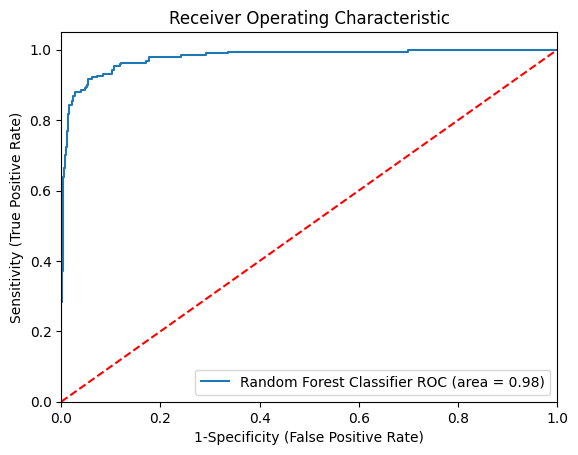

In [ ]:
### Plot ROC-AUC Curve
plt.figure()

auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=8, max_depth=15),
    }
]

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)


    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], auc))

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()